# Advertisment

As we discussed in the lecture, whether spending on ads($\$$). improve sales performance or not, we need to find how much should we spend on ads, would like to present similar case study

The data set contains information about money spent on advertisement and their generated sales. Money was spent on TV, radio and newspaper ads.

The objective is to use linear regression to understand how advertisement spending impacts sales.

1. Whether spending in advertisment impact sales? Linear Regression Problem
2. Try to answer what is the impact on sales through different channel, Case of Multiple Linear Regression We will discuss on next Lecture

## What is Regression?

We know, A function is set of ordered pairs of numbers (x,y), where value of y depend on x, describe kind of realationship between two variables

Hint: $$y = f(x)$$ where $$f(x) = \beta_0 + \beta_1 x$$

Intercept $\beta_0$ & Slope $\beta_1$ are the parameters, If these known you may find the value of $y$

Idea behind regression is to find the equation of the straight line that comes as close as possible to as many of the points as 
possible

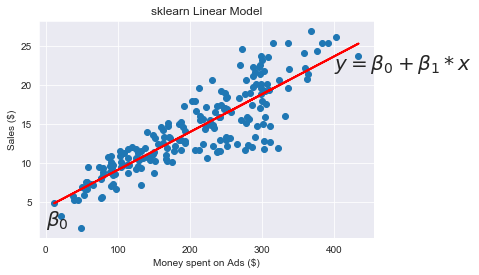

When you use regression to estimate the parameters $(x,y)$, you are estimating the parameters of the line that connects the mean $y$ at each location. Because the best that can be expected is to predict the mean for a certain location, researchers often write their regression models with an extra term, the error term $\epsilon$,

Hint: $$y = f(x)$$ where $$f(x) = \beta_0 + \beta_1 x + \epsilon$$

Assumption is $\epsilon$ error term should have constant mean and variance that follow normal distribution this is known as homoscedasticity into statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.0.1
1.18.1
0.10.0
3.1.3


In [3]:
# Preprocessing Input data
data = pd.read_csv('Advertising.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


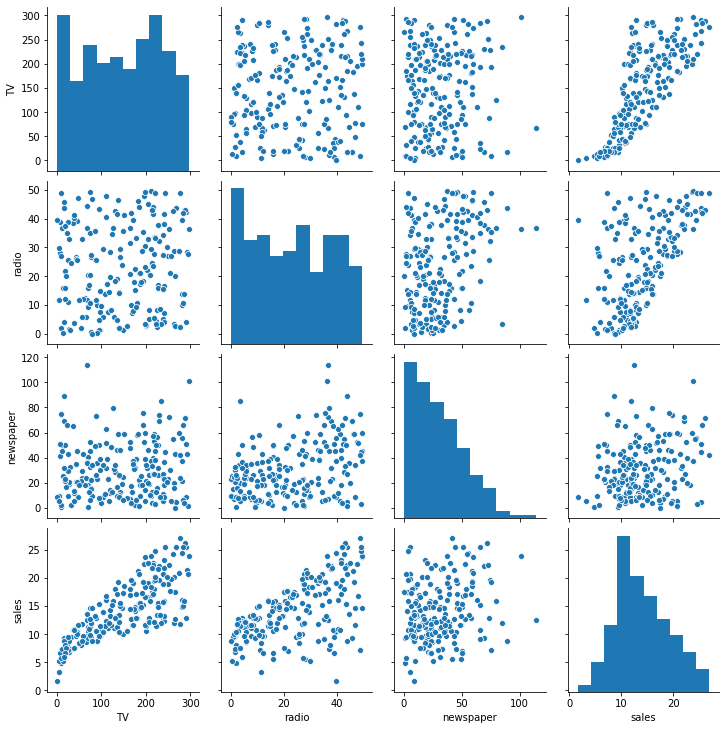

In [8]:
sns.pairplot(data)

In [9]:
mask  = np.triu(np.ones_like(data.corr())) #Created for upper traingluar matrix

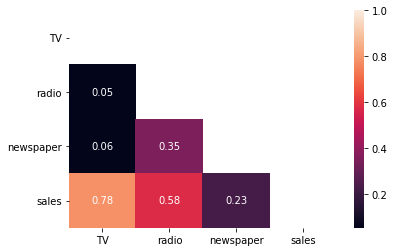

In [10]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask)

<font color='red' > What can we infer from above correlation map?

* _Create Additional feature which combine effect of all other explantory variable. called Advertisement (Adv)_
* _And then regress sales Vs Adv_

Hint: $$sales = \beta_0  + \beta_1 * Adv$$

_Notes: sales = y (reponse/dependent) & Adv = x (explantory/Independent)_
Hint: $$y = \beta_0  + \beta_1 * x$$

We need to find $$\hat{y}\approx \hat{\beta_0} + \hat{\beta_1} * x$$

To estimate $\beta_1$
$$\hat\beta_1 \approx \sum_{i=1}^{n}\frac{(\bar{x} - x)(\bar{y} - y)}{(\bar{x} - x)^2}$$

and $\beta_0$

$$\hat\beta_0 \approx y - \hat\beta_1 * x$$
Minimized the loss i.e MSE
$$min\sum_{i=1}^{n}\frac{(\hat{y} - y)^2}{2n}$$

Coefficent of Determination, describe proportion  of the dependent variable explained by the regression model.If the regression model is “perfect”, $SSE$ is zero, and $R^2$ is 1. If the regression model is a total failure, $SSE$ is equal to $SST$, no variance is explained by regression, and $R^2$ is zero.

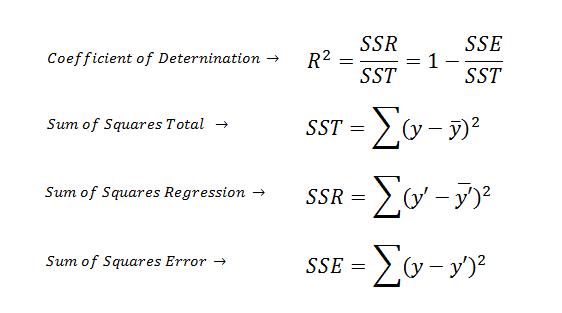

Reference Link: https://www.saedsayad.com/model_evaluation_r.htm

Anotherway to say: The coefficient of determination $R^2$ (or sometimes $r^2$) is another measure of how well the least squares performs as a predictor equation of $y$

In [11]:
data['Adv'] = data[['TV','radio','newspaper']].sum(axis=1) 

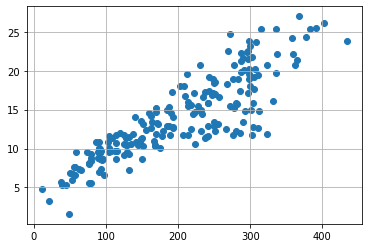

In [12]:
X = data.loc[:, 'Adv'].values
y = data.loc[:, "sales"].values
plt.scatter(X, y)
plt.grid('white')

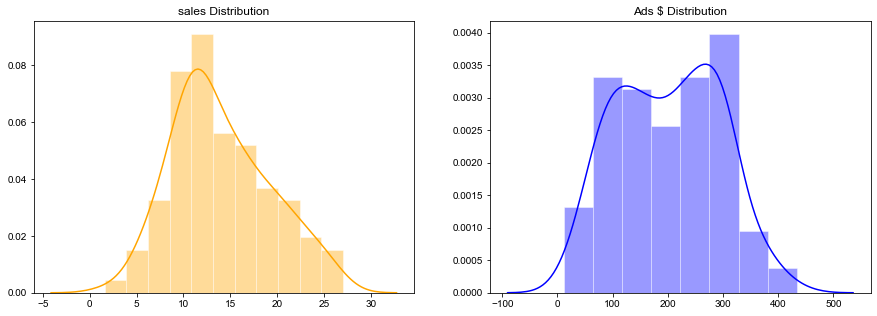

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.set_style('darkgrid')
sns.distplot(y, ax=ax[0], color ='orange')
ax[0].title.set_text('sales Distribution')
sns.distplot(X, ax=ax[1], color = 'blue')
ax[1].title.set_text('Ads $ Distribution')

In [14]:
def gradient_descent(X,y, learning_rate=0.001, epochs=100):
    
    """Gradient descent optimization"""
    
    # Define initial value
    weight = np.random.normal(0,1,1)[0] # initial weight
    bias = 0.2, # intial bias
    n = np.float(len(X))

    weight_lst = []
    bias_lst = []
    mse = []
    
    for i in range(epochs):
        
        y_hat = (weight * X)+ bias
        mse.append(np.sum(y_hat-y)**2/(2*n)) #Mean Absolute Percentage Accuracy
        
        D_m = (-2/n) * np.sum(X * (y - y_hat)) #derivative w.r.t weight
        D_c = (-2/n) * np.sum(y - y_hat) # Derivative w.r.t bias
        
        # new weigth and bias update
        weight_lst.append(weight)
        weight = weight - (learning_rate * D_m)
        
        bias_lst.append(bias[0])
        bias = bias - (learning_rate * D_c)
        
    return mse, weight_lst, bias_lst
#-----------

def r2(y_,y):
    """Coefficent of Determination, describe proportion  of the dependent variable explained by the regression model"""
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)
#----------

In [15]:
epochs = 20000
mse, weight, bias = gradient_descent(X,y, learning_rate=1e-8, epochs=epochs)

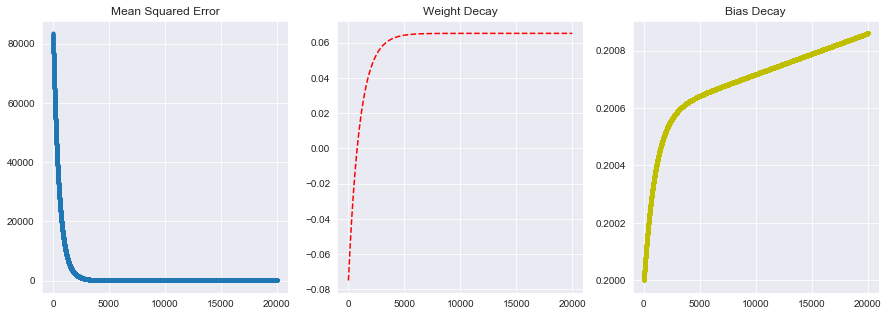

In [16]:
fig,ax  = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(range(epochs),mse,'.')
ax[0].title.set_text("Mean Squared Error")

ax[1].plot(range(epochs),np.array(weight), 'r--')
ax[1].title.set_text("Weight Decay")

ax[2].plot(range(epochs),np.array(bias), 'y.-')
ax[2].title.set_text("Bias Decay")


In [17]:
idx = np.argmin(mse)
idx

19999

In [18]:
y_hat = weight[idx]*X + bias[idx]

In [19]:
pd.DataFrame({'Actual':y,'Predicted':y_hat}).head()

,Actual,Predicted
0,22.1,22.205126
1,10.4,8.614832
2,9.3,8.843295
3,18.5,16.604515
4,12.9,16.519657


Text(0, 0.5, 'Sales ($)')

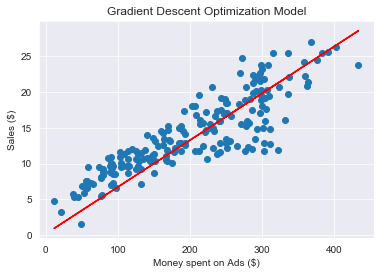

In [20]:
plt.scatter(X, y)
plt.plot(X, y_hat, 'r')
plt.title('Gradient Descent Optimization Model')
plt.xlabel("Money spent on Ads ($)")
plt.ylabel("Sales ($)")

---

# Using  Sklearn

In [21]:
from sklearn.linear_model  import LinearRegression

In [22]:
lmodel = LinearRegression()

In [23]:
new_X = data['Adv'].values.reshape(-1,1)
new_y = data['sales'].values.reshape(-1,1)
print(new_X.shape, new_y.shape)

(200, 1) (200, 1)


In [24]:
lmodel.fit(new_X, new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = lmodel.predict(new_X)

In [26]:
print("The linear model is: [y = {:.5} + {:.5} * X]".format(lmodel.intercept_[0], lmodel.coef_[0][0]))

The linear model is: [y = 4.243 + 0.048688 * X]


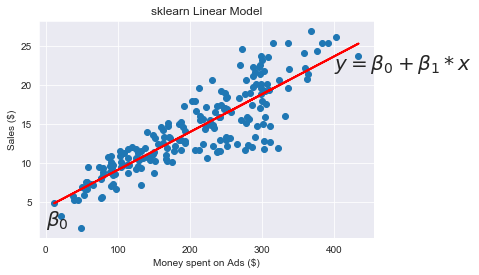

In [27]:
plt.scatter(data['Adv'], data['sales'])
plt.plot(data['Adv'], y_pred, c='r', linewidth=2)
plt.title('sklearn Linear Model')
plt.xlabel("Money spent on Ads ($)")
plt.ylabel("Sales ($)")
plt.text(0, 2,r"$\beta_0$", fontsize=20)
plt.text(400, 22,r"$y=\beta_0 + \beta_1*x$", fontsize=20)
plt.grid('white')

---

# _Model Comparison Gradient Vs Sklearn_

Text(0, 0.5, 'Sales ($)')

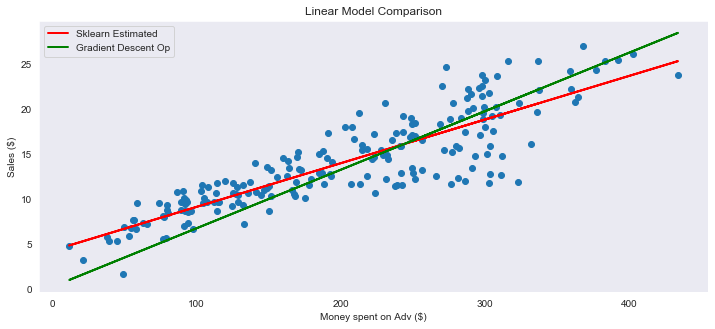

In [28]:
# Plot model side-side 
plt.figure(figsize=(12,5))
plt.scatter(data['Adv'], data['sales'], marker = 'o')
plt.plot(data['Adv'], y_pred, c='r', linewidth=2, label = 'Sklearn Estimated')
plt.plot(data['Adv'], y_hat, c='g', linewidth=2, label = "Gradient Descent Op")
plt.title('Linear Model Comparison')
plt.legend(loc='upper left')
plt.xlabel("Money spent on Adv ($)")
plt.ylabel("Sales ($)")

In [29]:
# Mean Squared Error
sklearn_mse = ((y_pred.reshape(-1) - y) **2).mean()
gd_mse = ((y_hat - y) **2).mean()

In [30]:
print("Sklearn Mean Squared Error: {}".format(sklearn_mse))
print("Gradient Descent Mean Squared Error: {}".format(gd_mse))

Sklearn Mean Squared Error: 6.692219880857797
Gradient Descent Mean Squared Error: 9.56395809351344


In [31]:
print("Sklearn R - Squared Error: {}".format(r2(y_pred.reshape(-1), y)))
print("Gradient Descent R-Squared : {}".format(r2(y_hat.reshape(-1), y)))

Sklearn R - Squared Error: 0.7529246402599598
Gradient Descent R-Squared : 0.6469006654648928


In [32]:
pd.DataFrame({'Actual':y,'Predicted_GD':y_hat,'Predicted_sklearn':y_pred.reshape(-1)}).head()

,Actual,Predicted_GD,Predicted_sklearn
0,22.1,22.205126,20.655712
1,10.4,8.614832,10.518896
2,9.3,8.843295,10.689303
3,18.5,16.604515,16.478292
4,12.9,16.519657,16.414998


---

# Notes:
1. MSE of Sklearn mse is less than Gradient Descent Optimization(GDO)
2. GDO depend on model hyper parameters (learning_rate and no of epochs)
3. Futher when you study about hyper tuning

---

# Home Work
Try scaling your data and than perform Gradient Descent Optimization(GDO), define function for MinMaxScaler and standardscaler

Hint: $$\\MinMaxScaler = \frac{x_i - min(x)}{max(x)-min(x)}$$  

Values will be scaled between $$0\leq x\leq1$$

Feature standardization (or Z-score normalization) so that follow a standard normal distribution with $\mu$=0 and $\sigma$=1

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows: $$\\z = \frac{x-\mu}{\sigma}$$

Reference for features Scaling https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

---

# Hypothesis Testing

So $$y= \begin{cases} {\beta_0+\epsilon} &\beta_1\text{ = 0 i.e means y does not depends on x} \\{\beta_1} &\text{some relationship between (x,y)}
\end{cases}$$

Null hypothesis will be $${H_o: \beta = 0} \\\text{There is no relationship between X and Y versus the alternative hypothesis}$$



Alternate hypothesis $${H_a: \beta \ne 0}\\\text{There is some relationship between X and Y} $$

To test the hypothesis. We compute a t-statistics

$$t = \frac{\hat\beta_1-0}{SE(\hat\beta_1)}$$

This will have a t-distribution with n - 2 degrees of freedom, assuming $\beta_1$ = 0.

Using computer it is easy to compute probability of observing any value equal to $|t|$ or larger. We
call this probability the p-value.

calculate:
$$SE(\hat\beta_1)^2=\frac{\sigma^2}{\sum_{i=1}^n{(x_i - \bar{x})}}$$

$$SE(\hat\beta_0)^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n{(x_i - \bar{x})}}]$$

where $$\sigma^2 = Var(\epsilon)$$

standard can be also used to compute confidence intervals. A 95% confidence interval is defined as a range of
values such that with 95% probability, the range will contain the true unknown value of the parameter. It has the form
 $$\hat\beta_1 \pm \ 2 \cdot SE(\hat\beta_1)$$
 
We will obtain above directly using statisical packages called $scipy.org$ or $statsmodels.org$

---

In [33]:
import statsmodels.api as sm

In [34]:
X = sm.add_constant(X)

In [35]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.06e-62
Time:                        11:39:20   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2430      0.439      9.676      0.0

In [36]:
#compare with
print("sklearn \t const: {} \t x1 : {}".format(lmodel.intercept_[0],lmodel.coef_[0][0]))
print("Gradient Optimization \t const: {} \t x1 : {}".format(bias[idx],weight[idx]))

sklearn 	 const: 4.243028216036329 	 x1 : 0.04868787931904815
Gradient Optimization 	 const: 0.20085973122044193 	 x1 : 0.0652751894372415


# End..